# Final Project: Những vụ tự tử tại Ấn Độ

Họ tên: Nguyễn Minh Tâm

MSSV: 1712746

In [46]:
#import 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

Ý tưởng tham khảo: [amulya9 notebook](https://www.kaggle.com/amulya9/data-analysis-of-suicides-in-india)  
Phần tham khảo: Vẽ bảng với [seaborn](https://seaborn.pydata.org)

## Khám phá dữ liệu bao quát

In [7]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [13]:
df.dtypes

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

In [17]:
# get real type of data
def open_object_dtype(s):
    dtypes = set()
    for item in s:
        item_type = type(item);
        if(item_type not in dtypes):
            dtypes.add(item_type)
    return dtypes

for col in df.columns:
    print(open_object_dtype(col))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


##### Vì hài lòng với data nên sẽ không tiền xử lý data

## Tiếp tục khám phá dữ liệu

Em sẽ vừa khám phá dữ liệu và từ những khám phá đưa ra những câu hỏi mới


### Tìm hiểu các cột

In [40]:
print("Numnber of state ", len(df["State"].unique()))
print("Year from ", df["Year"].min(), " to ", df["Year"].max())
print(df["Type_code"].unique())
print("Number of type ", len(df["Type"].unique()))

Numnber of state  38
Year from  2001  to  2012
['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
Number of type  69


Type sẽ thuộc Type_code, ví dụ trên cell `df.head()` ta thấy `Type_code="Causes"` thì `Type="Illness (Aids/STD)"` tức là lý do tự tử là do bị bệnh Aids/STD  
Ta sẽ làm việc nhiều với cột Type_code nên sẽ lấy ra những dataframe từ những cột này này

In [41]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

### Những thống kê cơ bản

#### Thống kê số vụ tự tử ở Ấn Độ theo trình độ giáo dục và giới tính

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

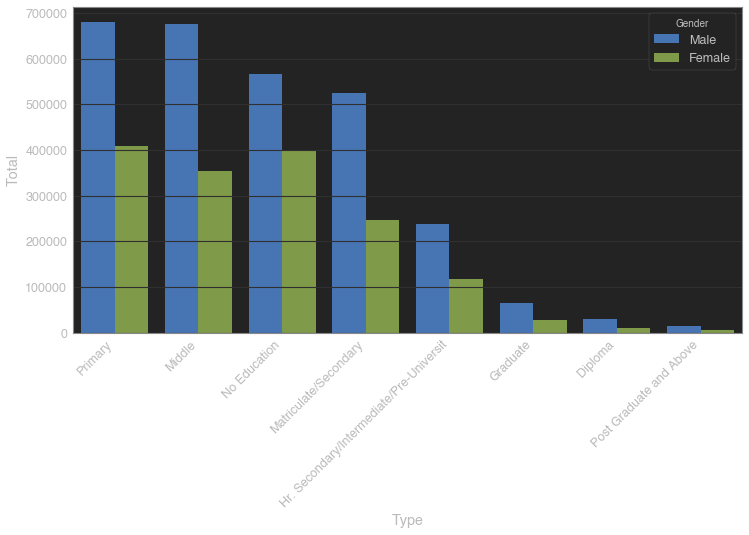

In [80]:
plt.figure(figsize=(12,6)) # default quá nhỏ
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False) # as_index=False cho giống SQL, 
                                                                                    # vẫn còn cột 'Type','Gender', không bị chuyển sang index
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort) # hue kiểu như groupby "Gender" r vẽ 2 cột gender
plt.xticks(rotation=45,ha='right') # tên hơi dài nên rotate 45 độ là chính giữa cột là đầu phải title

Dễ dàng thấy số lượng người tự tử rất cao ở trình độ thấp so với trình độ cao. 

#### Thống kê số vụ tự tử ở Ấn Độ theo hôn nhân và giới tính

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

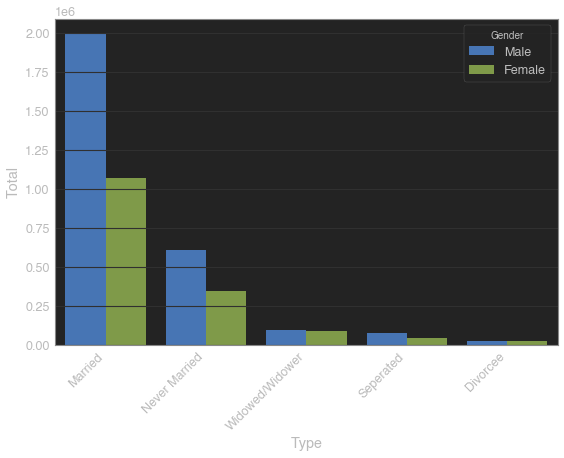

In [83]:
plt.figure(figsize=(9,6))
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender')
plt.xticks(rotation=45,ha='right')

Wow, số lượng những người tự tử khi đang cưới rất cao so với phần còn lại

#### Thống kê số vụ tự tử ở Ấn Độ theo lý do tự tử và giới tính

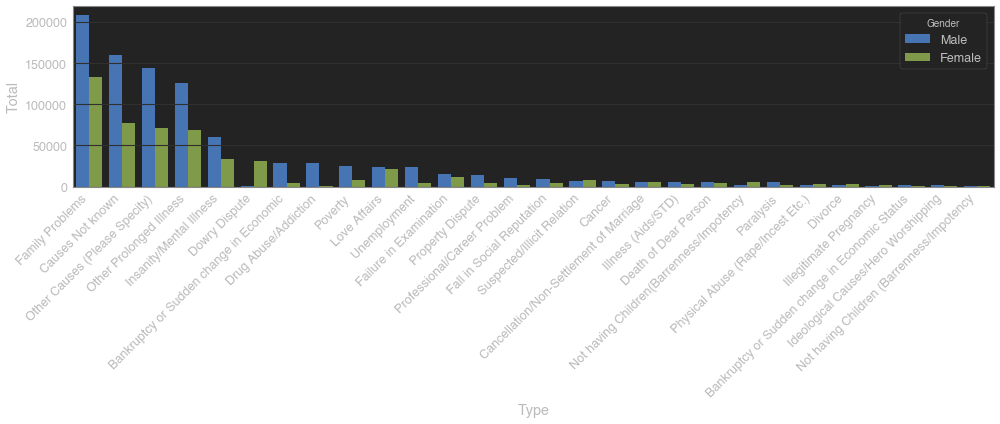

In [88]:
plt.figure(figsize=(14,6))
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

Wow, ở Ấn Độ có rất nhiều vấn đề gia đình, ta dễ thấy đó là lý do chính người Ấn Độ tự tử, rất đúng với việc số lượng người tự tử ở Ấn Độ khi đang trong hôn nhân ở thống kê cell trên.

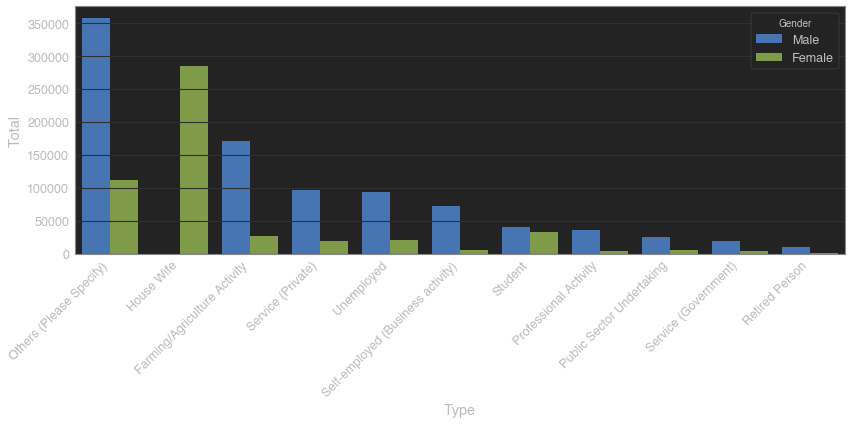

In [92]:
plt.figure(figsize=(12,6))
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

Bất ngờ ở đây là House Wife lại là nghề mà có người tự tử cao nhất mặc dù các thống kê bên trên người tự tử là nam chiếm đa số thậm chí gấp đôi.  
Top tiếp theo là người nông dân / phục vụ / thất nghiệp và đàn ông là chiếm đa số.  
Xâu chuỗi lại có thể những người nghèo đang lo lắng cơm áo gạo tiền cho gia đình không thể chịu đựng được nên phải tự tử, chiếm phần lớn số lượng tự tử.

### Những câu hỏi

In [ ]:
Vậy nhưng